In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# histogram of the number of gene sets per lib_name

In [2]:
geneset_sz = readr::read_tsv("geneset_sz.tsv")

Rows: 2939 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): lib_name, descr
dbl (1): num_genes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(geneset_sz)

lib_name,descr,num_genes
<chr>,<chr>,<dbl>
KEGG_2021_Human,ABC transporters,45
KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,100
KEGG_2021_Human,AMPK signaling pathway,120
KEGG_2021_Human,Acute myeloid leukemia,67
KEGG_2021_Human,Adherens junction,71
KEGG_2021_Human,Adipocytokine signaling pathway,69


In [4]:
unique(geneset_sz$lib_name)

[1] "KEGG_2021_Human"        "Reactome_2022"          "WikiPathway_2023_Human"

In [5]:
# Count the number of gene sets per lib_name
gene_set_counts <- geneset_sz %>%
  group_by(lib_name) %>%
  summarise(num_gene_sets = n()) 

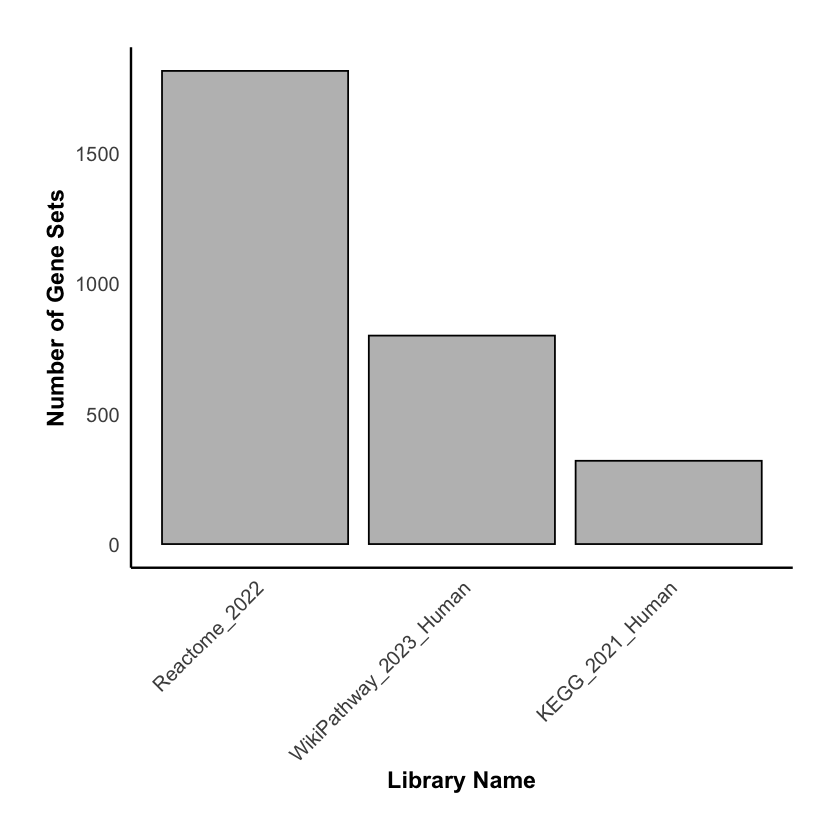

In [6]:
# Create the plot
p <- ggplot(gene_set_counts, aes(x = reorder(lib_name, -num_gene_sets), y = num_gene_sets)) +
  geom_bar(stat = "identity", fill = "grey", color = "black") +
  xlab("Library Name") +
  ylab("Number of Gene Sets") +
  theme_minimal(base_size = 15) + # Minimal theme with a base font size
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"), 
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    plot.margin = margin(1, 1, 1, 1, "cm"), # Top, right, bottom, left margins

  ) 
p

In [7]:
ggsave("figures/1_number_of_gene_sets_per_lib.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# boxplot of the number of genes in each gene set for each library

Warning message:
“The dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(y)` instead.”


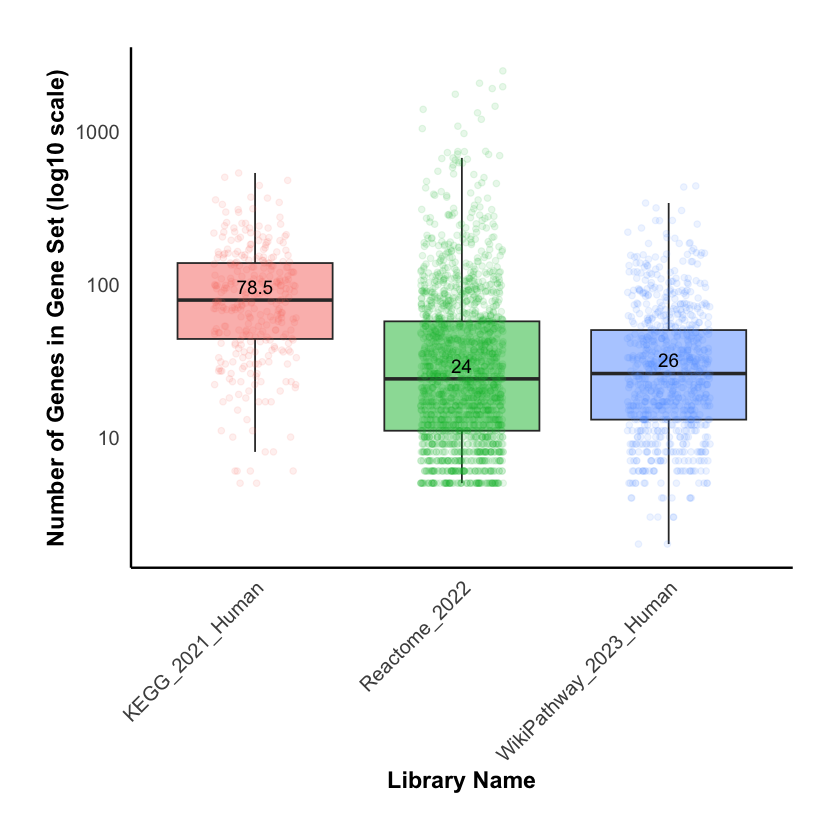

In [8]:
p <- ggplot(geneset_sz, aes(x = lib_name, y = num_genes, fill = lib_name)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  geom_jitter(width = 0.2, alpha = 0.1, aes(color = lib_name)) +  # Add jittered points to show individual data points
  stat_summary(fun = median, geom = "text", aes(label = round(..y.., 1)), vjust = -0.5, color = "black", size = 4) +  # Add median values
  scale_y_log10() +  # Use a logarithmic scale for the y-axis
  xlab("Library Name") +
  ylab("Number of Genes in Gene Set (log10 scale)") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [9]:
ggsave("figures/3_boxplot_number_of_genes_per_lib.pdf", plot = p, device = "pdf", width = 8, height = 8, dpi = 300)

# Percentage of significant gene sets

In [10]:
df <- readr::read_tsv("genes_overlap.tsv")

Rows: 34512 Columns: 13
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): database, model, gene_set, descr
dbl (9): ncurated, nllm, ninter, generatio, bgratio, non_hgcn, ndup, p_val, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
head(df)

database,model,gene_set,descr,ncurated,nllm,ninter,generatio,bgratio,non_hgcn,ndup,p_val,p_val_adj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,ABC transporters,45,13,7,0.5384615,0.002267459,6,0,3.258955e-16,1.042866e-13
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AGE-RAGE signaling pathway in diabetic complications,100,69,22,0.3188406,0.005038799,14,0,1.297110e-34,4.150751e-32
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AMPK signaling pathway,120,39,13,0.3333333,0.006046559,1,0,5.695660e-20,1.822611e-17
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Acute myeloid leukemia,67,20,4,0.2000000,0.003375995,3,0,5.592375e-07,1.789560e-04
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adherens junction,71,20,8,0.4000000,0.003577547,2,0,2.236612e-15,7.157158e-13
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adipocytokine signaling pathway,69,37,23,0.6216216,0.003476771,2,0,2.876419e-49,9.204541e-47


In [12]:
# Compute the percentage of "descr" that has "p_val_adj" < 0.01 for each "database" and "model"
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(p_val_adj < 0.01) / n() * 100)

`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


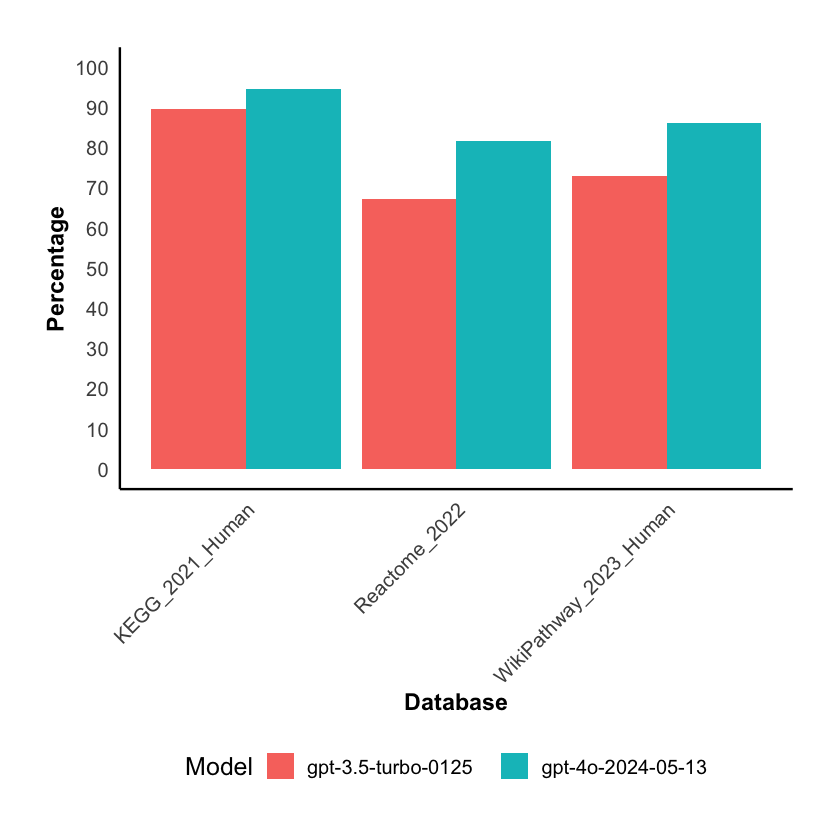

In [13]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [28]:
ggsave("figures/4_percent_sig_compare_models.pdf", plot = p, device = "pdf", width = 10, height = 8, dpi = 300)

# difference between p-values between GPT3 and GPT4
## number of significant gene sets by different p-val threshold

`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


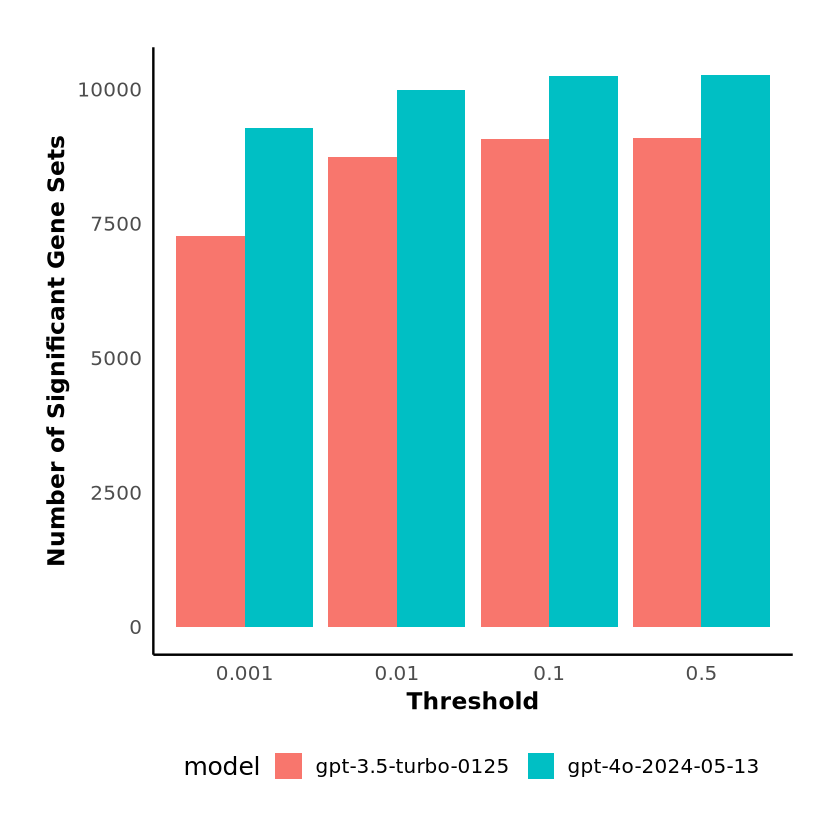

In [11]:
# Read the data
df <- read.csv('genes_overlap.tsv', sep='\t')

# Define p-value thresholds
p_value_thres <- c(0.001, 0.01, 0.1, 0.5)
df_res <- data.frame()

# Loop through each threshold
for (thres in p_value_thres) {
    
    df_thres <- df %>%
        filter(p_val < thres) %>%
        group_by(database, model) %>%
        summarise(gene_set = n()) %>%
        ungroup() %>%
        mutate(thres = thres)
    
    df_res <- bind_rows(df_res, df_thres)
}

# Plotting
 p <- ggplot(df_res, aes(x = factor(thres), y = gene_set, fill = model)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(
         x = "Threshold",
         y = "Number of Significant Gene Sets") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

p

In [12]:
ggsave("figures/number_of_significant_gene_sets_by_different_pval_threshold.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# how many gene sets where n_tries > 1 (fraction)


In [13]:
df <- read.csv('genes_overlap.tsv', sep='\t')

In [14]:
head(df)

,database,model,gene_set,descr,ncurated,nllm,ninter,generatio,bgratio,non_hgcn,ntries,ndup,p_val,p_val_adj
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,ABC transporters,45,13,7,0.5384615,0.002267459,6,1,0,3.258955e-16,1.042866e-13
2,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AGE-RAGE signaling pathway in diabetic complications,100,69,22,0.3188406,0.005038799,14,1,0,1.297110e-34,4.150751e-32
3,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AMPK signaling pathway,120,39,13,0.3333333,0.006046559,1,1,0,5.695660e-20,1.822611e-17
4,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Acute myeloid leukemia,67,20,4,0.2000000,0.003375995,3,1,0,5.592375e-07,1.789560e-04
5,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adherens junction,71,20,8,0.4000000,0.003577547,2,1,0,2.236612e-15,7.157158e-13
6,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adipocytokine signaling pathway,69,37,23,0.6216216,0.003476771,2,1,0,2.876419e-49,9.204541e-47


In [15]:
# Compute the percentage of "descr" that has more than 1 try
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(ntries > 1)/n()*100,
           count = sum(ntries > 1), .groups = 'drop')

In [16]:
percentage_df

database,model,percentage,count
<chr>,<chr>,<dbl>,<int>
KEGG_2021_Human,gpt-3.5-turbo-0125,0.31250000,1
KEGG_2021_Human,gpt-4o-2024-05-13,0.00000000,0
Reactome_2022,gpt-3.5-turbo-0125,0.11025358,2
Reactome_2022,gpt-4o-2024-05-13,0.05512679,1
WikiPathway_2023_Human,gpt-3.5-turbo-0125,0.00000000,0
WikiPathway_2023_Human,gpt-4o-2024-05-13,0.00000000,0


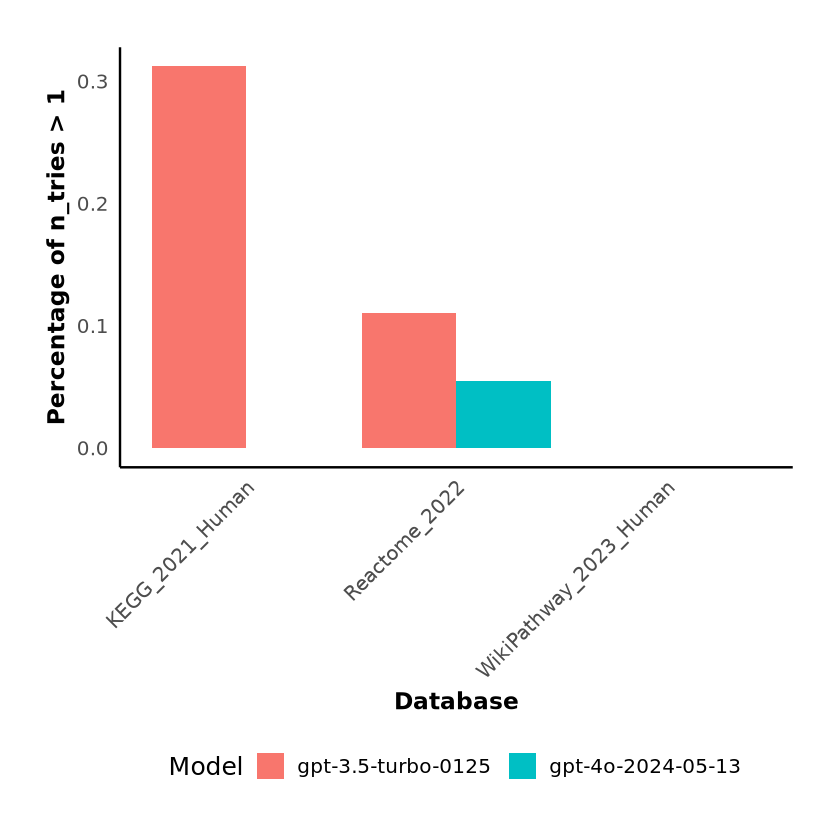

In [19]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  #scale_y_continuous(breaks = seq(0, 10, by = 1), limits = c(0, 1))+
  labs(
       x = "Database",
       y = "Percentage of n_tries > 1",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [20]:
ggsave("figures/n_tries.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# how many gene sets with duplicate genes (and maybe how many?)

In [21]:
df <- read.csv('genes_overlap.tsv', sep='\t')

In [22]:
# Compute the percentage of "descr" that llm generated duplicated genes
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(ndup > 1)/n()*100,
           count = sum(ndup > 0), .groups = 'drop')

In [23]:
percentage_df

database,model,percentage,count
<chr>,<chr>,<dbl>,<int>
KEGG_2021_Human,gpt-3.5-turbo-0125,14.062500,67
KEGG_2021_Human,gpt-4o-2024-05-13,3.437500,28
Reactome_2022,gpt-3.5-turbo-0125,6.229327,203
Reactome_2022,gpt-4o-2024-05-13,2.094818,109
WikiPathway_2023_Human,gpt-3.5-turbo-0125,7.268170,105
WikiPathway_2023_Human,gpt-4o-2024-05-13,1.250000,60


Saving 6.67 x 6.67 in image


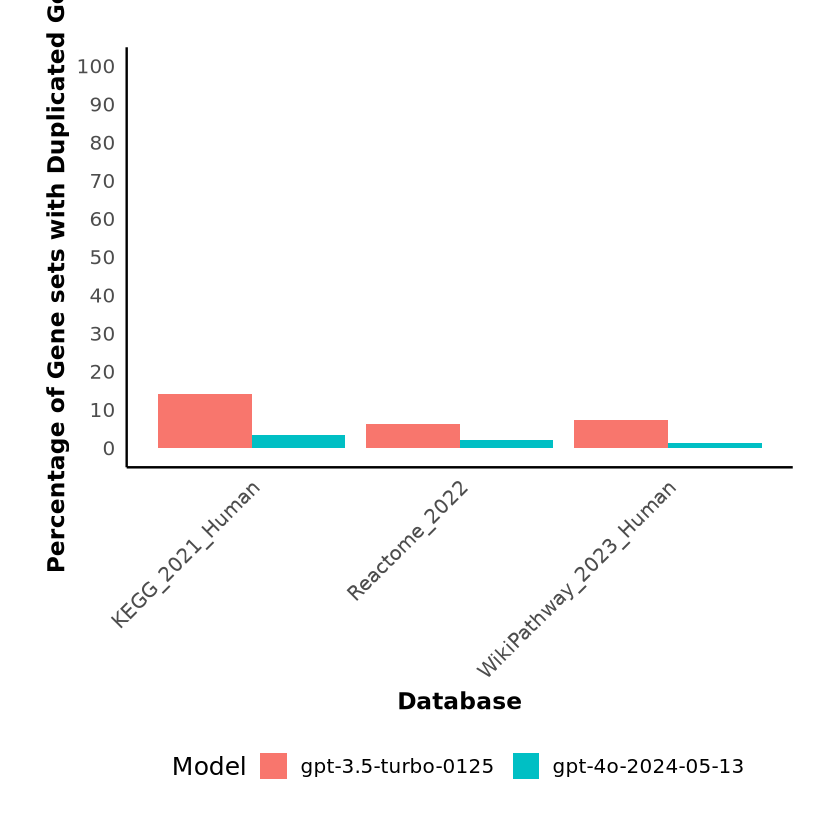

In [24]:
# fraction of gene sets where have duplicated genes

p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage of Gene sets with Duplicated Genes",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [25]:
ggsave("figures/percent_genesets_with_dups.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

In [26]:
plot_df <- df %>%
  filter(gene_set == "llm_genes_role", ndup > 1)

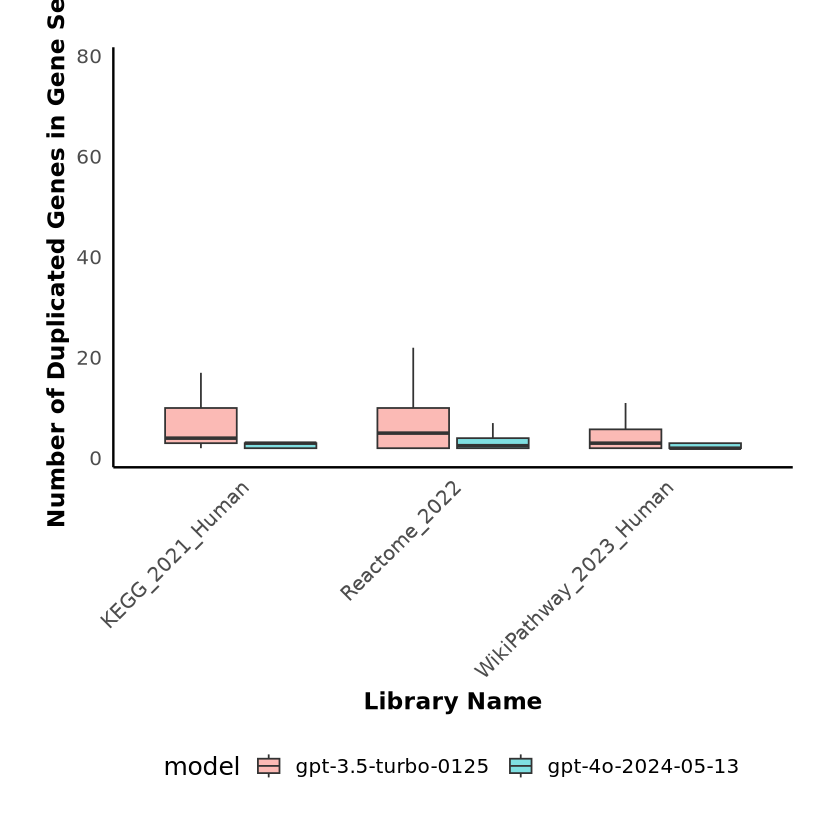

In [29]:
# plot the number of duplixated genes in each database
p <- ggplot(plot_df, aes(x = database, y = ndup, fill = model)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  #scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  xlab("Library Name") +
  ylab("Number of Duplicated Genes in Gene Set") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "bottom",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [30]:
ggsave("figures/number_duplicated_genes.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# Fraction of genes returned that were not HGNC genes.
Zia: Can you flip this around to do the percent that were HGCN? 
Jacqueline: I did

In [31]:
df <- read.csv('genes_overlap.tsv', sep='\t')

In [32]:
# Compute the percentage of "descr" that is not HGNC genes, formula non_hgcn/nllm
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = (1-sum(non_hgcn) / sum(nllm)) * 100,.groups = 'drop')
percentage_df

database,model,percentage
<chr>,<chr>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,86.05757
KEGG_2021_Human,gpt-4o-2024-05-13,94.46705
Reactome_2022,gpt-3.5-turbo-0125,86.44319
Reactome_2022,gpt-4o-2024-05-13,94.27928
WikiPathway_2023_Human,gpt-3.5-turbo-0125,86.76551
WikiPathway_2023_Human,gpt-4o-2024-05-13,94.96084


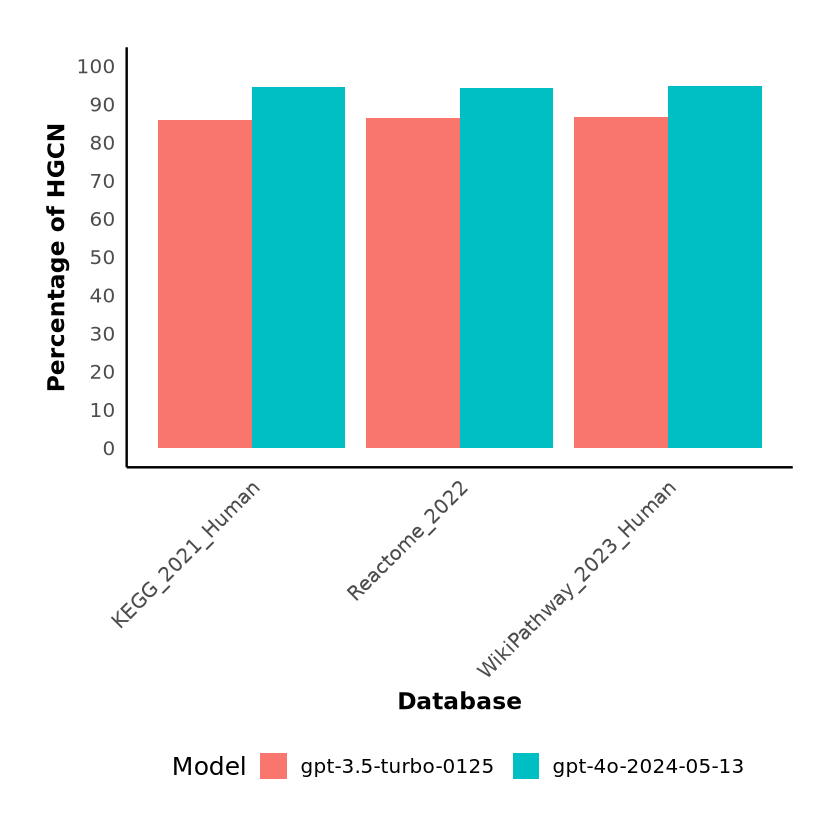

In [33]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage of HGCN",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [34]:
ggsave("figures/HGCN.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# token usage, for prompt with role

In [23]:
df <- read.csv('tok_use.tsv', sep='\t')
head(df)

,lib_name,model,gene_set,in_toks,out_toks
,<chr>,<chr>,<chr>,<int>,<int>
1,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,51489,90284
2,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_norole,48120,74499
3,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_reason,65400,67948
4,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high,70520,54151
5,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high_medium,70520,54151
6,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_ensembled,240600,371720


In [27]:
plot_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  mutate(total_toks = in_toks + out_toks)

summary_df <- plot_df %>%
  group_by(model) %>%
  summarize(
    in_toks = sum(in_toks),
    out_toks = sum(out_toks)
  )

summary_df

cost_df <- summary_df %>%
  mutate(
    cost = case_when(
      model == "gpt-3.5-turbo-0125" ~ in_toks / 1e6 * 0.5 + out_toks / 1e6 * 1.5,
      model == "gpt-4o-2024-05-13" ~ in_toks / 1e6 * 5 + out_toks / 1e6 * 15,
    )
  )
cost_df

model,in_toks,out_toks
<chr>,<int>,<int>
gpt-3.5-turbo-0125,492836,583880
gpt-4o-2024-05-13,496508,931135


model,in_toks,out_toks,cost
<chr>,<int>,<int>,<dbl>
gpt-3.5-turbo-0125,492836,583880,1.122238
gpt-4o-2024-05-13,496508,931135,16.449565


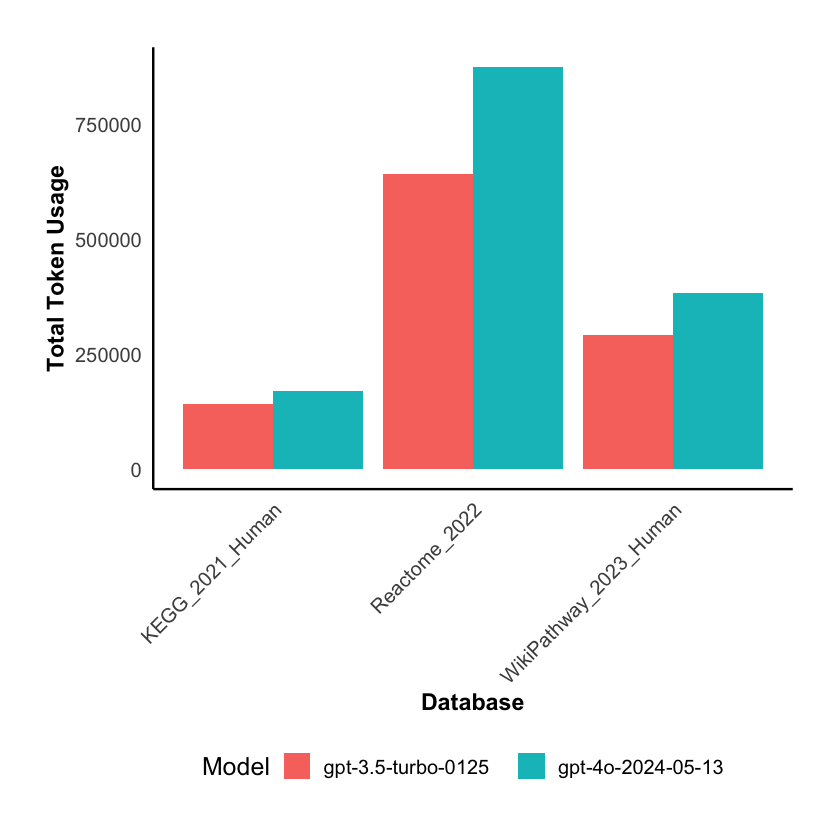

In [28]:
# Total token usage
p <- ggplot(plot_df, aes(x = lib_name, y = total_toks, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous()+
  labs(
       x = "Database",
       y = "Total Token Usage",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [38]:
ggsave("figures/total_token_usage.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

In [39]:
plot_df_long <- plot_df %>%
  pivot_longer(cols = c(in_toks, out_toks), names_to = "token_type", values_to = "toks")

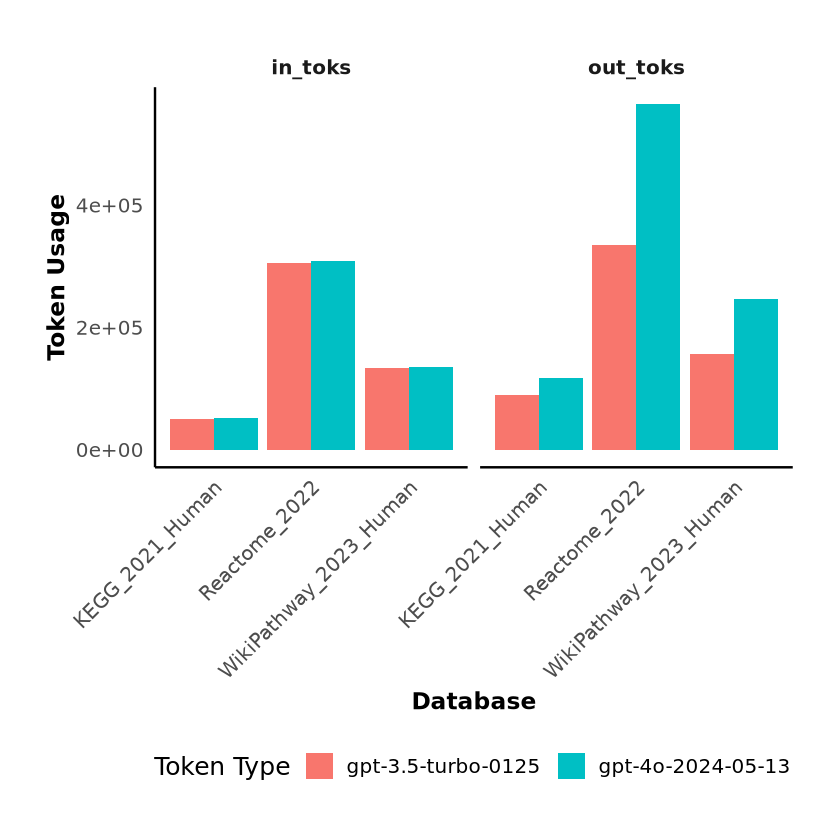

In [40]:
# Create the side-by-side bar plot
p <- ggplot(plot_df_long, aes(x = lib_name, y = toks, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  facet_wrap(~ token_type) + # Facet by model to maintain distinction
  scale_y_continuous() +
  labs(
    x = "Database",
    y = "Token Usage",
    fill = "Token Type"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

print(p)

In [41]:
ggsave("figures/token_usage_breakdonw.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# size of gene sets comparing with ensembl vs. no role vs. high confidence (show sets are smaller)

In [42]:
df <- read.csv('genes_overlap.tsv', sep='\t')
head(df)

,database,model,gene_set,descr,ncurated,nllm,ninter,generatio,bgratio,non_hgcn,ntries,ndup,p_val,p_val_adj
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,ABC transporters,45,13,7,0.5384615,0.002267459,6,1,0,3.258955e-16,1.042866e-13
2,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AGE-RAGE signaling pathway in diabetic complications,100,69,22,0.3188406,0.005038799,14,1,0,1.297110e-34,4.150751e-32
3,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AMPK signaling pathway,120,39,13,0.3333333,0.006046559,1,1,0,5.695660e-20,1.822611e-17
4,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Acute myeloid leukemia,67,20,4,0.2000000,0.003375995,3,1,0,5.592375e-07,1.789560e-04
5,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adherens junction,71,20,8,0.4000000,0.003577547,2,1,0,2.236612e-15,7.157158e-13
6,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adipocytokine signaling pathway,69,37,23,0.6216216,0.003476771,2,1,0,2.876419e-49,9.204541e-47


In [43]:
unique(df$gene_set)

[1] "llm_genes_role"             "llm_genes_norole"          
[3] "llm_genes_reason"           "llm_genes_conf_high"       
[5] "llm_genes_conf_high_medium" "llm_ensembled"

In [44]:
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_norole', 'llm_genes_conf_high', 'llm_ensembled' ))



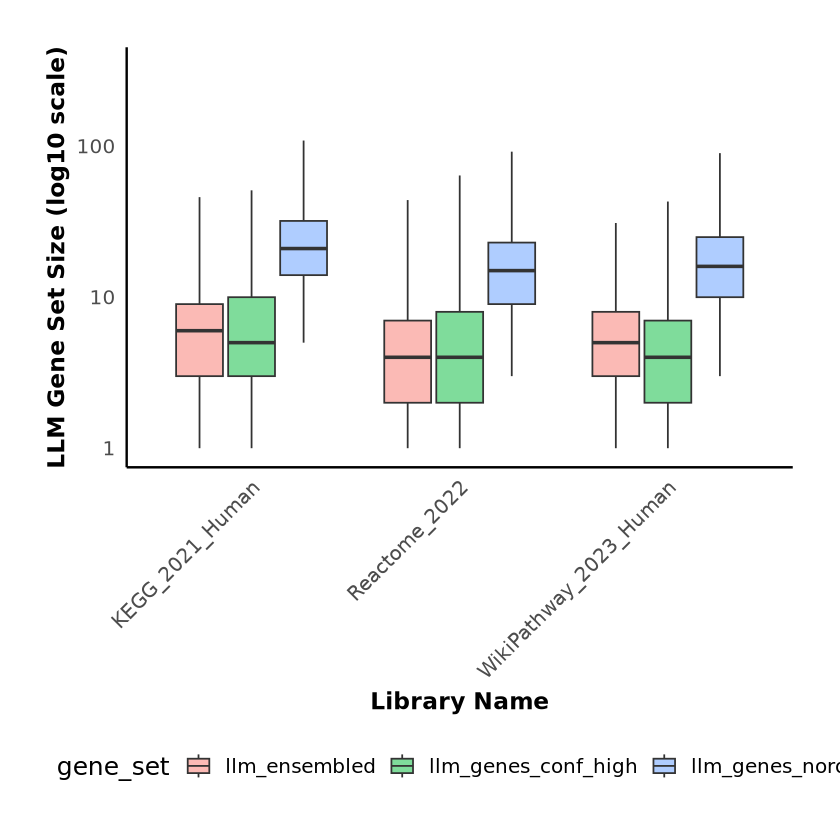

In [46]:
# plot the number of duplixated genes in each database
p <- ggplot(plot_df, aes(x = database, y = nllm, fill = gene_set)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  scale_y_log10() +  # Use a logarithmic scale for the y-axis
  xlab("Library Name") +
  ylab("LLM Gene Set Size (log10 scale)") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "bottom",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [47]:
ggsave("figures/llm_geneset_size.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# plot showing token usage for all 4 strategies

In [8]:
df <- read.csv('tok_use.tsv', sep='\t')
head(df)

,lib_name,model,gene_set,in_toks,out_toks
,<chr>,<chr>,<chr>,<int>,<int>
1,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,51489,90284
2,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_norole,48120,74499
3,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_reason,65400,67948
4,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high,70520,54151
5,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high_medium,70520,54151
6,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_ensembled,240600,371720


In [9]:
df <- df %>%
  mutate(total_toks = in_toks + out_toks)

In [15]:
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_reason', 'llm_genes_conf_high', 'llm_ensembled', 'llm_genes_norole'))


In [16]:
plot_df

lib_name,model,gene_set,in_toks,out_toks,total_toks
<chr>,<chr>,<chr>,<int>,<int>,<int>
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_norole,48120,74499,122619
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_reason,65400,67948,133348
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high,70520,54151,124671
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_ensembled,240600,371720,612320
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_norole,48572,107538,156110
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_reason,65532,187685,253217
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_conf_high,70652,152304,222956
KEGG_2021_Human,gpt-4o-2024-05-13,llm_ensembled,243009,534011,777020
Reactome_2022,gpt-3.5-turbo-0125,llm_genes_norole,288099,270200,558299


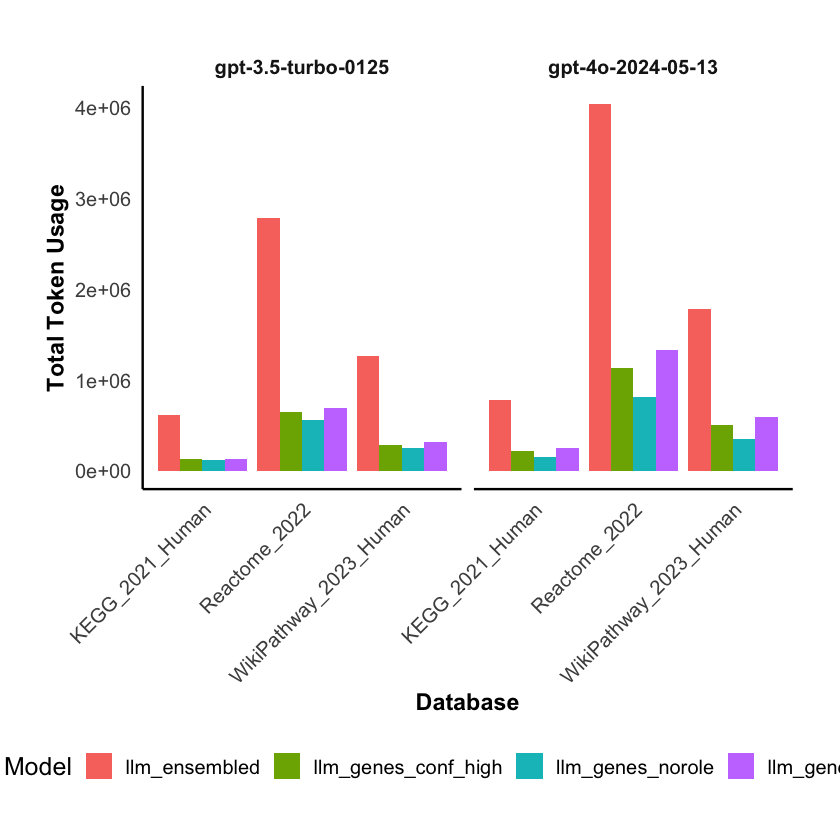

In [17]:
# Create the faceted bar plot
p <- ggplot(plot_df, aes(x = lib_name, y = total_toks, fill = gene_set)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous() +
  labs(
    x = "Database",
    y = "Total Token Usage",
    fill = "Model"
  ) +
  facet_wrap(~ model) +  # Facet by gene_set and allow different y-scales for each facet
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

p


In [21]:
ggsave("figures/ntoken_by_method.pdf", plot = p, device = "pdf",width = 9, height = 6, dpi = 300)

# calculation of cost
Zia: This calculation is incorrect. You need to count input and output tokens separately.


In [70]:
# gpt-3.5-turbo-0125 $0.50 / 1M input tokens
# gpt-4o-2024-05-13 $$5.00 / 1M input tokens

In [55]:
df <- read.csv('tok_use.tsv', sep='\t')
df <- df %>%
  mutate(total_toks = in_toks + out_toks)
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_role', 'llm_genes_norole', 'llm_genes_conf_high', 'llm_ensembled')) %>%
  mutate(cost = case_when(
    model == "gpt-3.5-turbo-0125" ~ total_toks * 0.5 / 1e6,
    model == "gpt-4o-2024-05-13" ~ total_toks * 5 / 1e6
  ))


In [56]:
plot_df

lib_name,model,gene_set,in_toks,out_toks,total_toks,cost
<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,51489,90284,141773,0.0708865
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_norole,48120,74499,122619,0.0613095
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_conf_high,70520,54151,124671,0.0623355
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_ensembled,240600,371720,612320,0.3061600
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_role,51772,117996,169768,0.8488400
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_norole,48572,107538,156110,0.7805500
KEGG_2021_Human,gpt-4o-2024-05-13,llm_genes_conf_high,70652,152304,222956,1.1147800
KEGG_2021_Human,gpt-4o-2024-05-13,llm_ensembled,243009,534011,777020,3.8851000
Reactome_2022,gpt-3.5-turbo-0125,llm_genes_role,306458,335874,642332,0.3211660


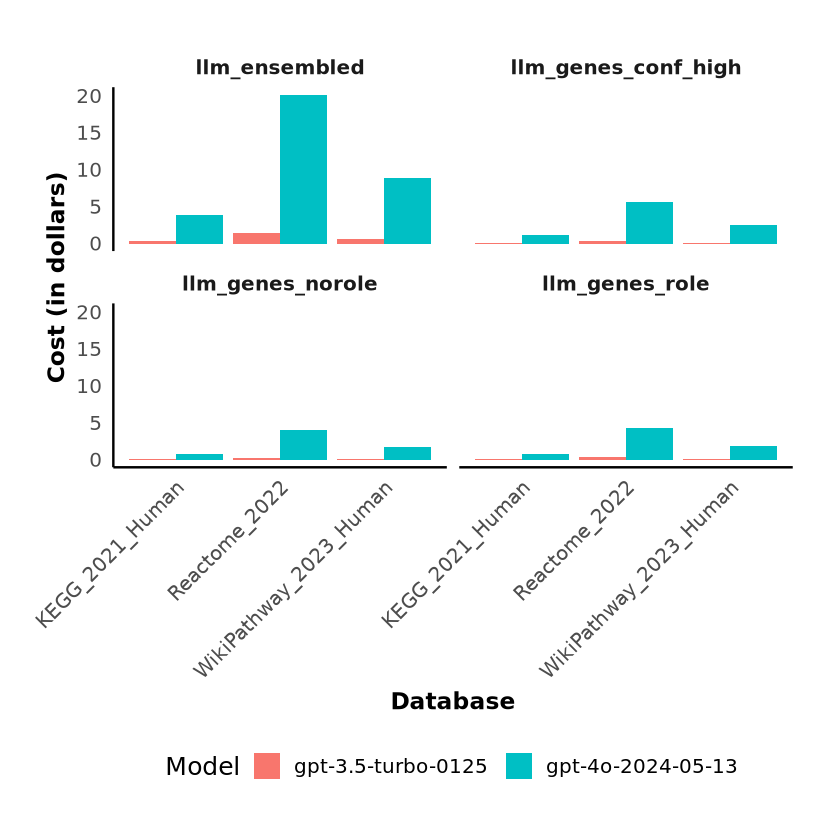

In [57]:
# Create the faceted bar plot
p <- ggplot(plot_df, aes(x = lib_name, y = cost, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous() +
  labs(
    x = "Database",
    y = "Cost (in dollars)",
    fill = "Model"
  ) +
  facet_wrap(~ gene_set) +  # Facet by gene_set and allow different y-scales for each facet
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

print(p)

In [58]:
ggsave("figures/cost_by_method.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# ROUGE

In [2]:
df <- read.delim('rouge_scores.tsv', header = TRUE, sep = "\t")

In [4]:
head(df)

,library,gt_name_1,gt_name_2,gsai_ROUGE1_1,gsai_ROUGE1_2,llm2geneset_ROUGE1_1,llm2geneset_ROUGE1_2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,KEGG_2021_Human,Basal transcription factors,Relaxin signaling pathway,0.25,0.2500000,0.4,0.6666667
2,KEGG_2021_Human,Non-small cell lung cancer,Ascorbate and aldarate metabolism,0.00,0.3636364,0.0,0.0000000
3,KEGG_2021_Human,Primary immunodeficiency,Salivary secretion,0.00,0.0000000,0.0,1.0000000
4,KEGG_2021_Human,Viral myocarditis,PD-L1 expression and PD-1 checkpoint pathway in cancer,0.00,0.1250000,0.0,0.1538462
5,KEGG_2021_Human,Chronic myeloid leukemia,Pentose and glucuronate interconversions,0.00,0.1333333,0.0,0.0000000
6,KEGG_2021_Human,Huntington disease,Olfactory transduction,0.00,0.5000000,0.0,0.4000000


# Gene set 1

### Show ROUGE1 scores distribution across different library

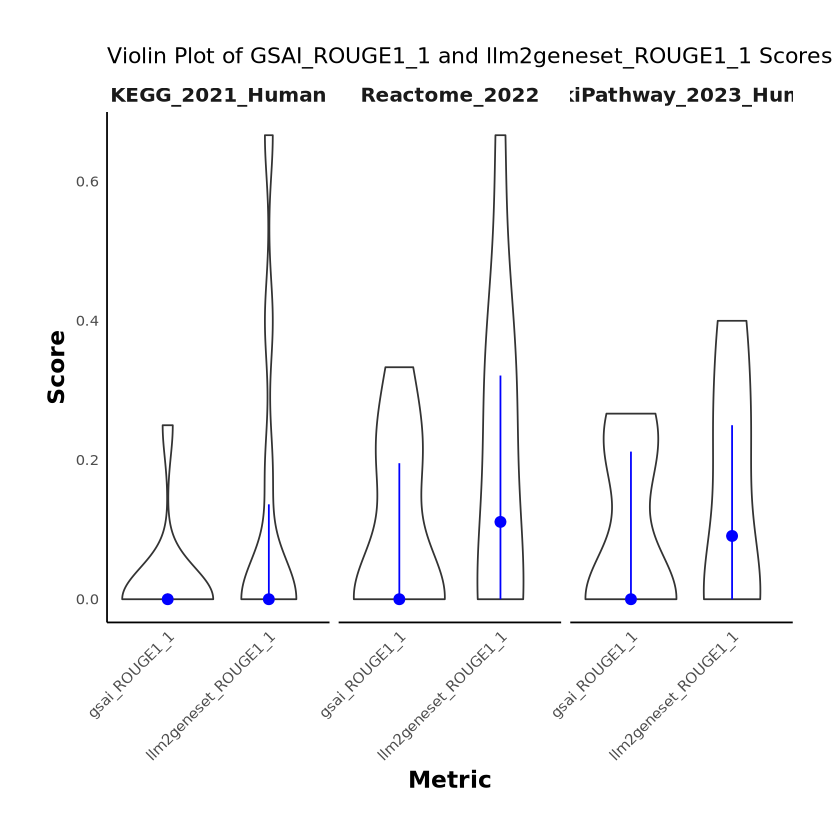

In [41]:
df_long <- df %>%
  pivot_longer(cols = c(gsai_ROUGE1_1, llm2geneset_ROUGE1_1), 
               names_to = "Metric", 
               values_to = "Score")

# Create the violin plot
ggplot(df_long, aes(x = Metric, y = Score)) +
  geom_violin() +
  stat_summary(fun = median, geom = "point", shape = 23, size = 2, color = "red", fill = "yellow") +
  stat_summary(
    fun.data = function(y) {
      data.frame(
        y = median(y),
        ymin = quantile(y, 0.25),
        ymax = quantile(y, 0.75)
      )
    },
    geom = "pointrange", 
    color = "blue"
  ) +
  facet_wrap(~ library) +
  labs(title = "Violin Plot of GSAI_ROUGE1_1 and llm2geneset_ROUGE1_1 Scores by Library",
       x = "Metric",
       y = "Score") +
  theme_minimal()+
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )


### count number of predicted gene set names with ROUGE1 > 0.3
ROUGE1 < 0.3 consider very bad

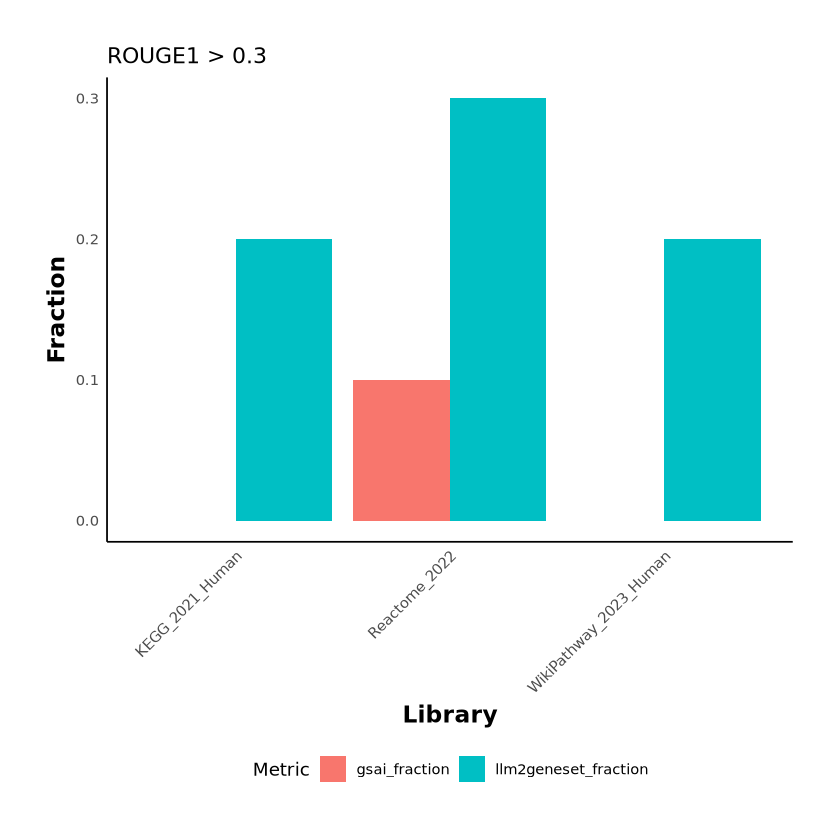

In [34]:
# Group by "library" and calculate the fractions
df_fractions <- df %>%
  group_by(library) %>%
  summarise(
    gsai_fraction = sum(gsai_ROUGE1_1 > 0.3, na.rm = TRUE) / n(),
    llm2geneset_fraction = sum(llm2geneset_ROUGE1_1 > 0.3, na.rm = TRUE) / n()
  )

# Reshape the fractions data to long format for plotting
df_long <- df_fractions %>%
  pivot_longer(cols = c(gsai_fraction, llm2geneset_fraction), 
               names_to = "Metric", 
               values_to = "Fraction")

# Create the bar plot to show the fractions
ggplot(df_long, aes(x = library, y = Fraction, fill = Metric)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "ROUGE1 > 0.3",
       x = "Library",
       y = "Fraction") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

# Gene set 2

### Show ROUGE1 scores distribution across different library

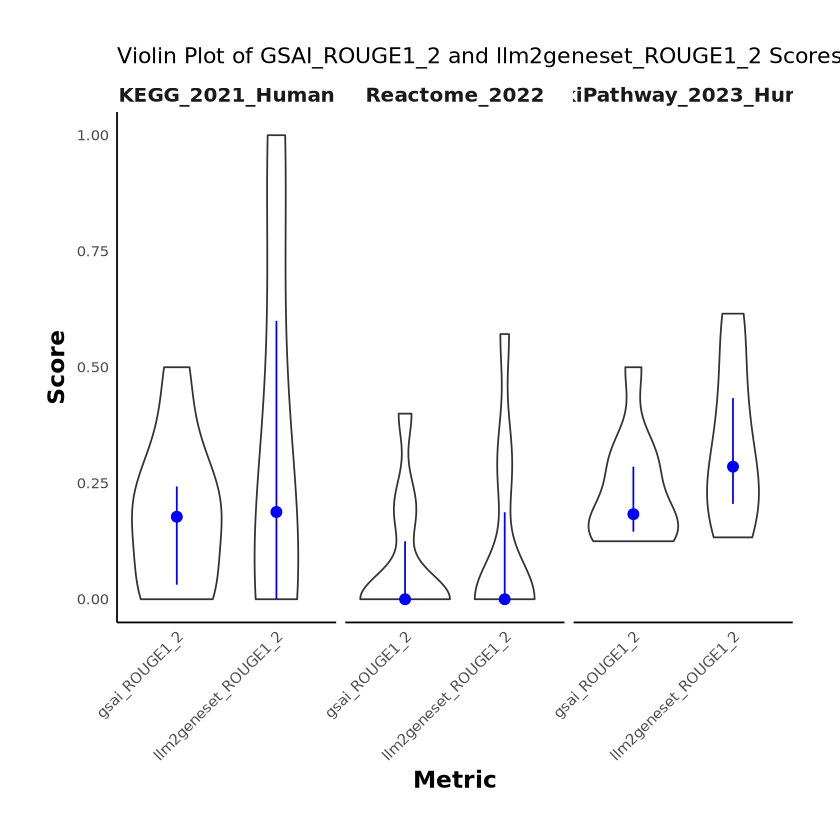

In [42]:
df_long <- df %>%
  pivot_longer(cols = c(gsai_ROUGE1_2, llm2geneset_ROUGE1_2), 
               names_to = "Metric", 
               values_to = "Score")

# Create the violin plot
ggplot(df_long, aes(x = Metric, y = Score)) +
  geom_violin() +
  stat_summary(fun = median, geom = "point", shape = 23, size = 2, color = "red", fill = "yellow") +
  stat_summary(
    fun.data = function(y) {
      data.frame(
        y = median(y),
        ymin = quantile(y, 0.25),
        ymax = quantile(y, 0.75)
      )
    },
    geom = "pointrange", 
    color = "blue"
  ) +
  facet_wrap(~ library) +
  labs(title = "Violin Plot of GSAI_ROUGE1_2 and llm2geneset_ROUGE1_2 Scores by Library",
       x = "Metric",
       y = "Score") +
  theme_minimal()+
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

### count number of predicted gene set names with ROUGE1 > 0.3
ROUGE1 < 0.3 consider very bad

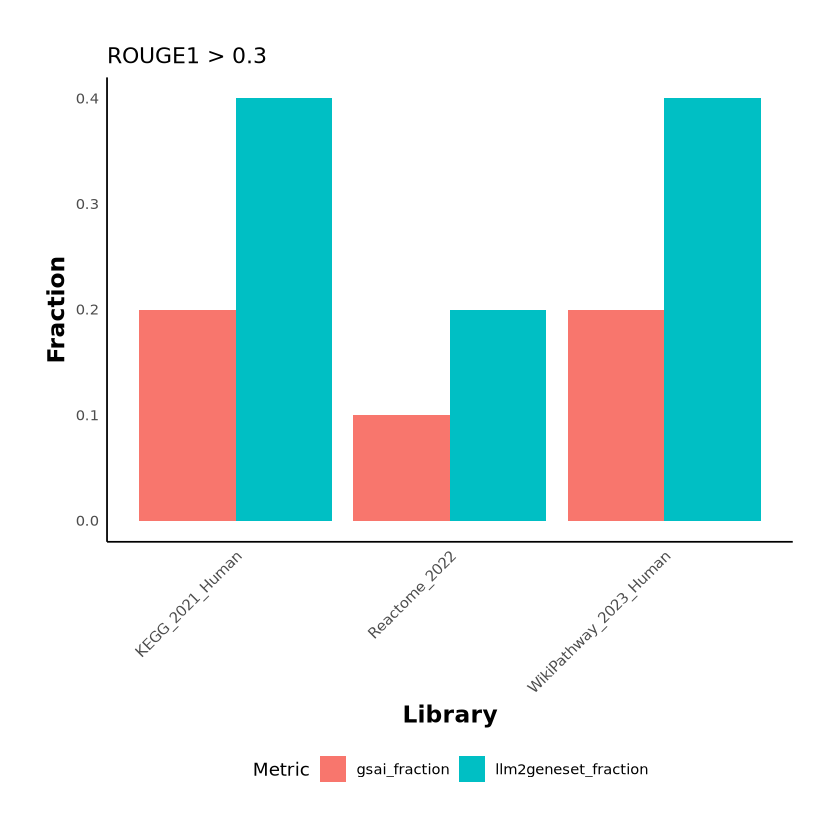

In [43]:
# Group by "library" and calculate the fractions
df_fractions <- df %>%
  group_by(library) %>%
  summarise(
    gsai_fraction = sum(gsai_ROUGE1_2 > 0.3, na.rm = TRUE) / n(),
    llm2geneset_fraction = sum(llm2geneset_ROUGE1_2 > 0.3, na.rm = TRUE) / n()
  )

# Reshape the fractions data to long format for plotting
df_long <- df_fractions %>%
  pivot_longer(cols = c(gsai_fraction, llm2geneset_fraction), 
               names_to = "Metric", 
               values_to = "Fraction")

# Create the bar plot to show the fractions
ggplot(df_long, aes(x = library, y = Fraction, fill = Metric)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "ROUGE1 > 0.3",
       x = "Library",
       y = "Fraction") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )